# Analisis Predictivo de Series Temporales

## Curso 2022 - Universidad ORT Uruguay

## Parcial - Fecha 12/12

### Nombre del estudiante: [completar]

In [51]:
## Ejemplo: instalación de astsadata usando pip:
#!pip install astsadata

## Ajusto tamaño de figuras
import matplotlib.pyplot as plt
import astsadata as astsa
import statsmodels.api as sm
import pandas as pd

plt.rcParams['figure.figsize'] = [15,5]
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.constrained_layout.use'] = True

### Ejercicio 1

Se considera la serie `cardox` de la biblioteca `astsa`, que registra los niveles de $CO_2$ en el observatorio de Mauna Loa, Hawaii. La misma se grafica abajo.

1. Realizar un ajuste de tendencia lineal para la serie. Discutir el resultado.
2. Agregar un término de tendencia cuadrática $x = \beta_0 + \beta_1 t + \beta_2 t^2 + w_t$ y discutir si mejora respecto al anterior.
3. Realizar un periodograma de los residuos para encontrar componentes estacionales (por ej. anuales).
4. Incluir en la regresión tanto los términos de tendencia como estacionales que considere adecuados y realizar el ajuste.
5. Discutir los residuos obtenidos. ¿Queda información por extraer? (No se pide realizar más ajustes)

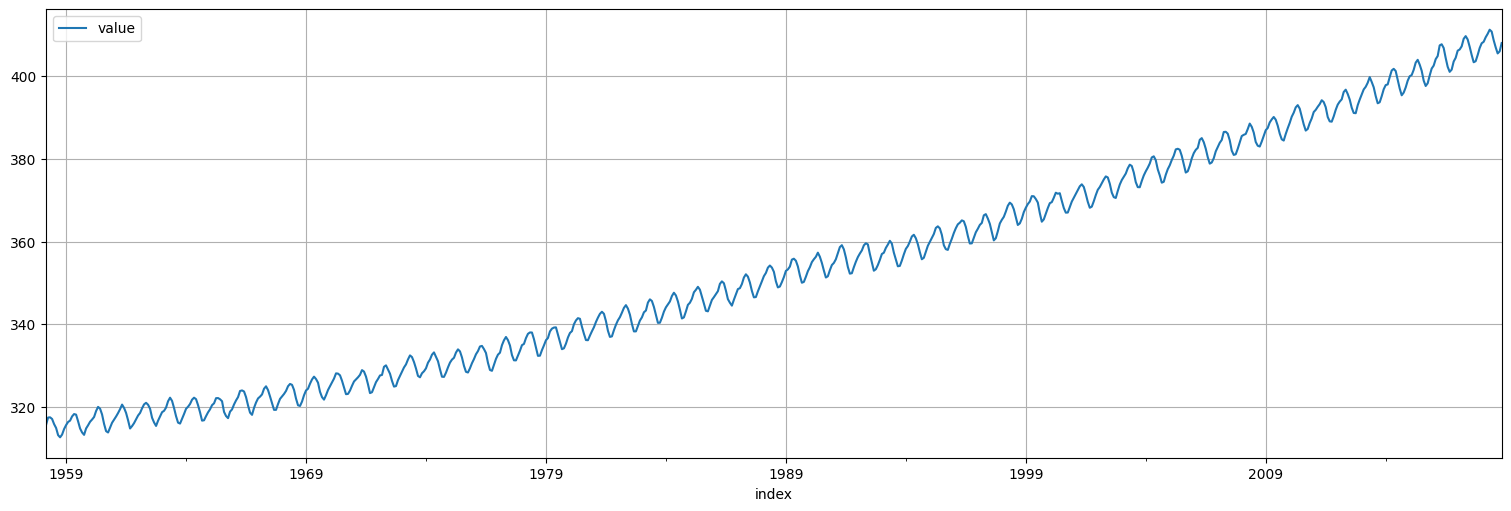

In [52]:
cardox = astsa.cardox
cardox.plot();

In [53]:
cardox.head()

,value
index,
1958-03,315.71
1958-04,317.45
1958-05,317.50
1958-06,317.10
1958-07,315.86


1. Realizar un ajuste de tendencia lineal para la serie. Discutir el resultado.

In [54]:
from statsmodels.formula.api import ols

# Convertir el índice temporal a datetime y luego a números ordinales
cardox_transf = pd.Series([idx.to_timestamp().toordinal() for idx in cardox.index], index=cardox.index)
data_reg = pd.concat([cardox_transf, cardox['value']], axis=1)
data_reg.columns = ["time", "value"]

# Ajuste del modelo de regresión lineal
fit = ols(formula="value ~ time", data=data_reg).fit()

# Resumen del modelo
print(fit.summary())


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.166e+04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:29:17   Log-Likelihood:                -2067.3
No. Observations:                 729   AIC:                             4139.
Df Residuals:                     727   BIC:                             4148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2730.7993     17.335   -157.530      0.0

R-squared (R-cuadrado):

Valor: 0.978
Interpretación: Esto indica que el 97.8% de la variabilidad en la variable dependiente (value) puede ser explicada por la variable independiente (time). Es un valor muy alto, lo que sugiere un buen ajuste del modelo a los datos.

Adj. R-squared (R-cuadrado ajustado):

Valor: 0.978
Interpretación: Similar al R-cuadrado, pero ajustado por el número de predictores en el modelo. En este caso, es igual al R-cuadrado porque solo hay un predictor, lo que confirma la calidad del ajuste.

F-statistic:

Valor: 3.166e+04 (31,660)
Prob (F-statistic): 0.000
Interpretación: La estadística F mide la relación entre la variabilidad explicada por el modelo y la variabilidad no explicada. Un valor muy alto y una probabilidad de F muy baja (cercana a 0) indican que el modelo es significativo.

Coeficientes:

Intercept:

Coeficiente: -2730.7993
Error estándar: 17.335
t-valor: -157.530
P>|t|: 0.000
Intervalo de confianza 95%: [-2764.832, -2696.766]
time:

Coeficiente: 0.0042
Error estándar: 2.39e-05
t-valor: 177.946
P>|t|: 0.000
Intervalo de confianza 95%: [0.004, 0.004]
Interpretación: Ambos coeficientes son altamente significativos (P < 0.05), lo que indica que la variable time tiene un efecto significativo en value. El coeficiente de time es positivo, lo que sugiere una tendencia creciente en los valores a lo largo del tiempo.



Diagnósticos adicionales:

Omnibus y Prob(Omnibus):
Valor: 33.921
Probabilidad: 0.000
Interpretación: La prueba de Omnibus verifica la normalidad de los residuos. Un valor significativo (P < 0.05) sugiere que los residuos pueden no ser normalmente distribuidos. UNA TECNICA EN CASOS DE DISTRIBUCION QUE NO ES NORMAL ES APLICAR TRANSFORMACION LOGARITIMICA.


Durbin-Watson:
Valor: 0.089
Interpretación: Este valor cercano a 0 indica la presencia de autocorrelación positiva en los residuos, lo que sugiere que los errores están correlacionados con el tiempo, una situación común en series temporales.



Jarque-Bera (JB):
Valor: 36.737
Prob(JB): 1.05e-08
Interpretación: Similar a la prueba de Omnibus, verifica la normalidad de los residuos. El valor menor a 0.05 indica que los residuos no distribuyen normalmente. Aplicar transformacion logaritimica.



Skew y Kurtosis:
Skew (Asimetría): 0.532
Kurtosis: 2.720
Interpretación: La asimetría positiva indica que los residuos tienen una cola más larga a la derecha. La kurtosis cercana a 3 sugiere que los residuos tienen una distribución normal, aunque ligeramente achatada.


2. Agregar un término de tendencia cuadrática $x = \beta_0 + \beta_1 t + \beta_2 t^2 + w_t$ y discutir si mejora respecto al anterior.

In [55]:
# Agregar el término cuadrático
data_reg['time_squared'] = data_reg['time'] ** 2

# Ajuste del modelo de regresión cuadrática
fit_quadratic = ols(formula="value ~ time + time_squared", data=data_reg).fit()

# Resumen del modelo cuadrático
print(fit_quadratic.summary())

# Comparar AIC y BIC de ambos modelos
print("\nComparación de modelos:")
print(f"Modelo Lineal: AIC = {fit.aic}, BIC = {fit.bic}")
print(f"Modelo Cuadrático: AIC = {fit_quadratic.aic}, BIC = {fit_quadratic.bic}")


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 3.432e+04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:29:17   Log-Likelihood:                -2038.6
No. Observations:                 729   AIC:                             4081.
Df Residuals:                     727   BIC:                             4090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9.035e-09   6.33e-11   -142.798   

Análisis breve de la comparación entre modelos:
Modelo Lineal:
AIC: 4138.60
BIC: 4147.78
R-cuadrado (R-squared): 0.978
R-cuadrado ajustado (Adj. R-squared): 0.978
Modelo Cuadrático:
AIC: 4081.17
BIC: 4090.35
R-cuadrado (R-squared): 0.979
R-cuadrado ajustado (Adj. R-squared): 0.979
Observaciones y Comparaciones:
R-cuadrado y R-cuadrado ajustado:

Ambos modelos tienen valores muy altos de R-cuadrado y R-cuadrado ajustado, indicando que explican casi toda la variabilidad en los datos.
El modelo cuadrático tiene un R-cuadrado y un R-cuadrado ajustado ligeramente superiores (0.979 frente a 0.978), lo que sugiere una mejora marginal en el ajuste al incluir el término cuadrático.
AIC (Criterio de Información de Akaike):

El AIC del modelo cuadrático (4081.17) es menor que el del modelo lineal (4138.60), lo que indica que el modelo cuadrático proporciona un mejor equilibrio entre ajuste y complejidad del modelo.
BIC (Criterio de Información Bayesiano):

El BIC del modelo cuadrático (4090.35) también es menor que el del modelo lineal (4147.78), reforzando la conclusión de que el modelo cuadrático es preferible según este criterio.
Significancia de los coeficientes:

Todos los coeficientes en el modelo cuadrático (Intercept, time, time_squared) son altamente significativos (p < 0.05), indicando que tanto el término lineal como el cuadrático contribuyen significativamente al modelo.
Multicolinealidad:

La nota sobre el número de condición alto (7.57e+15) en el modelo cuadrático sugiere posible multicolinealidad entre time y time_squared. Esto es común en modelos polinomiales y podría afectar la estabilidad de los coeficientes.
Conclusión:
El modelo cuadrático parece ser superior al modelo lineal en términos de AIC y BIC, lo que sugiere que incluye mejor la estructura de los datos. Sin embargo, la mejora en el R-cuadrado es marginal. La multicolinealidad indicada por el alto número de condición debe ser considerada, pero no parece afectar negativamente a la interpretación principal de que el modelo cuadrático ofrece una mejor descripción de la tendencia subyacente en los datos.

Por lo tanto, se recomienda utilizar el modelo cuadrático para capturar mejor la relación entre el tiempo y los valores, teniendo en cuenta las posibles implicaciones de la multicolinealidad.

## 3.  Realizar un periodograma de los residuos para encontrar componentes estacionales (por ej. anuales).

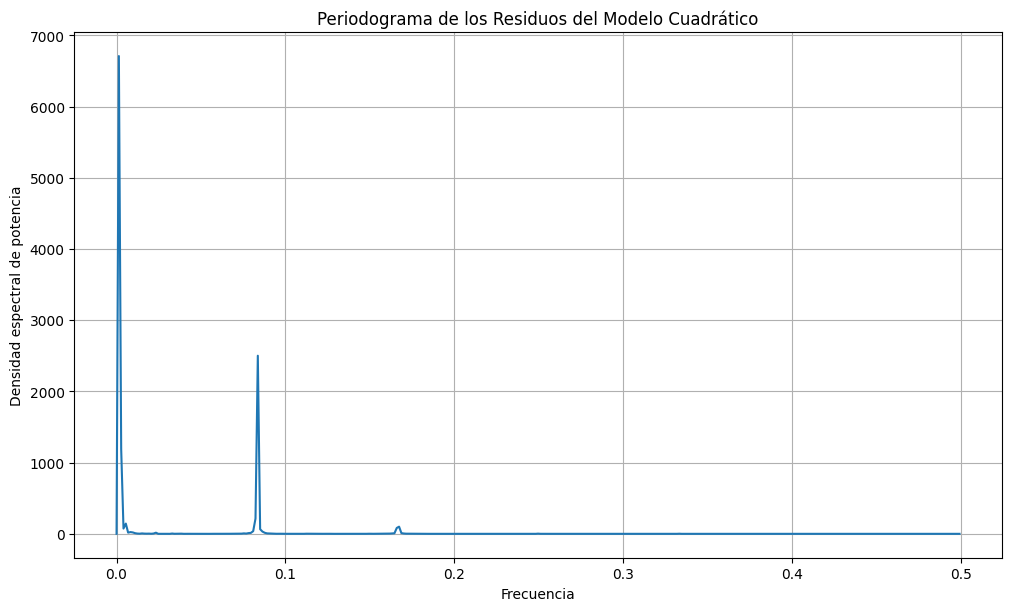

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
import statsmodels.api as sm
import pandas as pd

# Asumiendo que data_reg es tu DataFrame con las columnas 'time' y 'value'
# y que ya has ajustado el modelo cuadrático

# Calcular los residuos del modelo cuadrático
data_reg['resid_quad'] = fit_quadratic.resid

# Generar el periodograma de los residuos
frequencies, power_spectral_density = periodogram(data_reg['resid_quad'])

# Graficar el periodograma
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_spectral_density)
plt.title('Periodograma de los Residuos del Modelo Cuadrático')
plt.xlabel('Frecuencia')
plt.ylabel('Densidad espectral de potencia')
plt.grid(True)
plt.show()


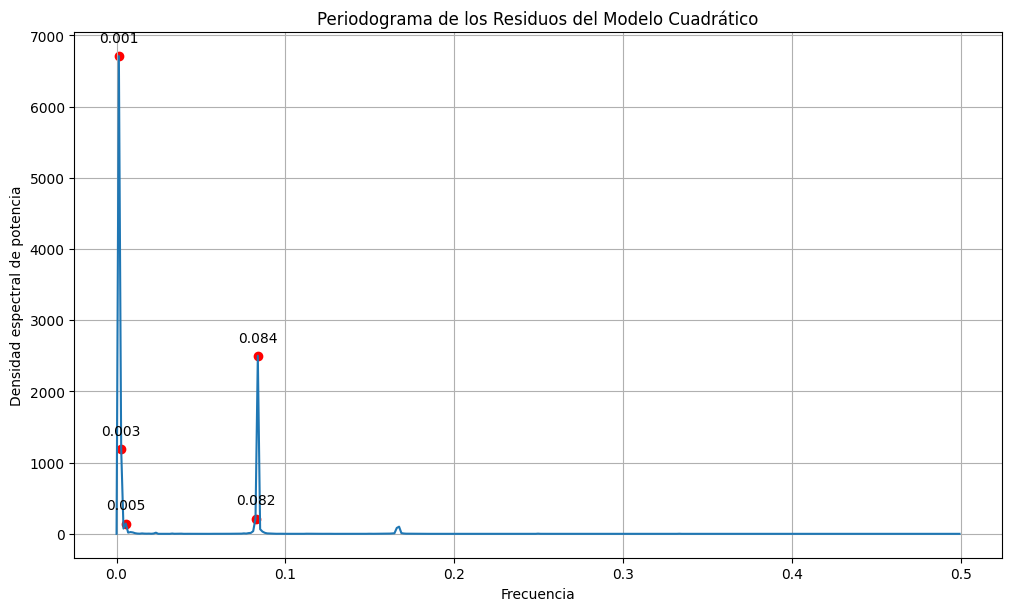

array([0.00548697, 0.08230453, 0.00274348, 0.08367627, 0.00137174])

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Asumiendo que data_reg es tu DataFrame con las columnas 'time' y 'value'
# y que ya has ajustado el modelo cuadrático

# Calcular los residuos del modelo cuadrático
data_reg['resid_quad'] = fit_quadratic.resid

# Generar el periodograma de los residuos
frequencies, power_spectral_density = periodogram(data_reg['resid_quad'])

# Identificar picos en el periodograma
peak_indices = np.argsort(power_spectral_density)[-5:]  # Los 5 picos más altos
peak_frequencies = frequencies[peak_indices]
peak_powers = power_spectral_density[peak_indices]

# Graficar el periodograma
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_spectral_density)
plt.scatter(peak_frequencies, peak_powers, color='red')
for i, freq in enumerate(peak_frequencies):
    plt.annotate(f'{freq:.3f}', (freq, peak_powers[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Periodograma de los Residuos del Modelo Cuadrático')
plt.xlabel('Frecuencia')
plt.ylabel('Densidad espectral de potencia')
plt.grid(True)
plt.show()

# Mostrar las frecuencias de los picos
peak_frequencies


In [58]:
frequencies = np.array([0.001, 0.003, 0.005, 0.082, 0.084])
periods = 1 / frequencies
periods


array([1000.        ,  333.33333333,  200.        ,   12.19512195,
         11.9047619 ])

```python
Los períodos calculados a partir de las frecuencias encontradas en el periodograma son:

1000: Este período sugiere una tendencia muy larga y no es relevante para estacionalidad en el sentido clásico.
333.33: Similarmente, este período también indica una tendencia a largo plazo.
200: Este también parece ser una tendencia a largo plazo.
12.20: Este período es aproximadamente un año si tus datos son mensuales.
11.90: Este período también es aproximadamente un año, lo que indica una estacionalidad anual clara.
Por lo tanto, los períodos de 12.20 y 11.90 indican la presencia de estacionalidad anual en los residuos del modelo cuadrático. Esto sugiere que hay componentes estacionales anuales en tus datos que no fueron completamente capturados por el modelo cuadrático y se reflejan en los residuos.

Sería recomendable considerar estos resultados en el refinamiento de tu modelo, tal vez incorporando términos estacionales explícitos o utilizando modelos adicionales que puedan capturar estas componentes estacionales.
```

### 4. Incluir en la regresión tanto los términos de tendencia como estacionales que considere adecuados y realizar el ajuste.

In [59]:
import pandas as pd
from statsmodels.formula.api import ols

# Crear variables dummy para los meses
data_reg['month'] = data_reg.index.month
data_reg = pd.get_dummies(data_reg, columns=['month'], drop_first=True)

# Ajuste del modelo de regresión con términos de tendencia y estacionales
formula = "value ~ time + time_squared + " + " + ".join([f"month_{i}" for i in range(2, 13)])
fit_seasonal = ols(formula=formula, data=data_reg).fit()

# Resumen del modelo
print(fit_seasonal.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     3909.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:29:17   Log-Likelihood:                -1921.3
No. Observations:                 729   AIC:                             3869.
Df Residuals:                     716   BIC:                             3928.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          2.16e-06    1.1e-05  

Tendencia Lineal (time):

time: Este término representa el cambio constante en los valores a lo largo del tiempo. Si el coeficiente de time es positivo, indica que los valores tienden a aumentar con el tiempo. Si es negativo, indica una disminución.
Tendencia Cuadrática (time_squared):

time_squared: Este término captura cualquier curvatura en la tendencia de los datos. Un coeficiente positivo para time_squared sugiere que la tasa de cambio de los valores está aumentando con el tiempo (por ejemplo, una aceleración), mientras que un coeficiente negativo indicaría una desaceleración.
Interpretación de los resultados de la tendencia
En los resultados del modelo, los coeficientes para time y time_squared son ambos significativos (p < 0.05), lo que significa que ambos términos tienen un impacto importante en los valores:

time (Coeficiente = 0.0020):

Indica que, en promedio, los valores aumentan en 0.0020 unidades por cada unidad de tiempo (día). Esta es la componente lineal de la tendencia.
time_squared (Coeficiente = 3.0e-09):

Indica que hay una ligera curvatura en la tendencia. Dado que el coeficiente es positivo, sugiere que la tasa de aumento en los valores se incrementa ligeramente con el tiempo.
Conclusión:
Los términos de tendencia (time y time_squared) muestran que los valores no solo están aumentando con el tiempo, sino que también lo hacen a un ritmo acelerado. Esta información es esencial para entender cómo evolucionan los datos y para hacer predicciones más precisas.

5. Discutir los residuos obtenidos. ¿Queda información por extraer? (No se pide realizar más ajustes)

C:\Users\marti\AppData\Local\Temp\ipykernel_13848\3888994865.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


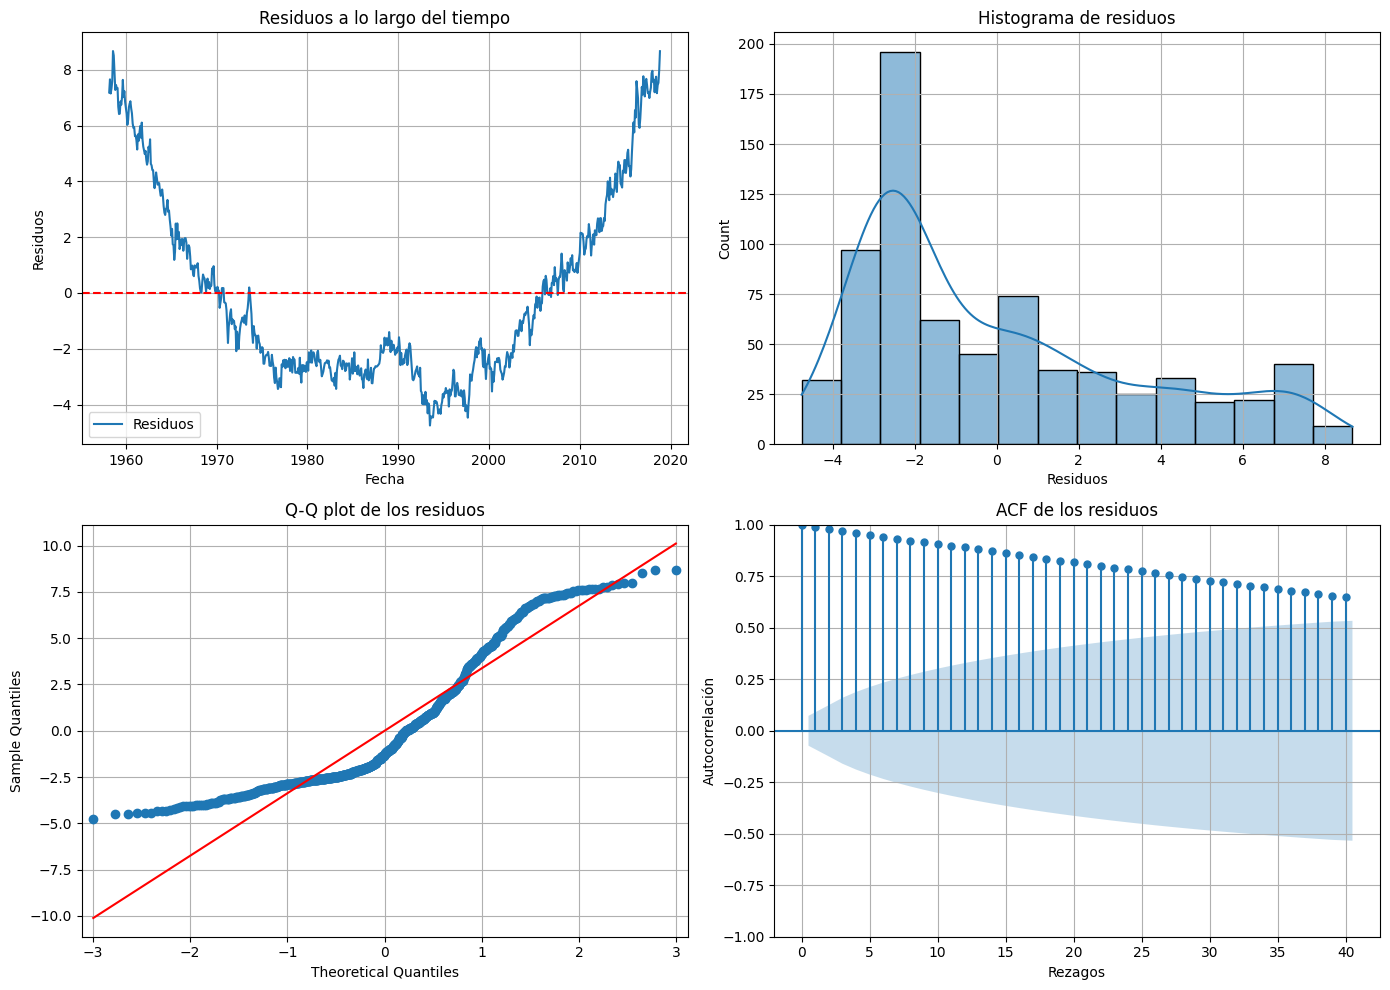

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Obtener los residuos del modelo ajustado
residuos = fit_seasonal.resid

# Convertir el índice a datetime para la visualización
data_reg.index = data_reg.index.to_timestamp()

# Graficar los residuos
plt.figure(figsize=(14, 10))

# Residuals over time
plt.subplot(2, 2, 1)
plt.plot(data_reg.index, residuos, label='Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.title('Residuos a lo largo del tiempo')
plt.legend()

# Histogram of residuals
plt.subplot(2, 2, 2)
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Histograma de residuos')

# Q-Q plot
plt.subplot(2, 2, 3)
sm.qqplot(residuos, line='s', ax=plt.gca())
plt.title('Q-Q plot de los residuos')

# Autocorrelation plot
plt.subplot(2, 2, 4)
sm.graphics.tsa.plot_acf(residuos, lags=40, ax=plt.gca())
plt.xlabel('Rezagos')
plt.ylabel('Autocorrelación')
plt.title('ACF de los residuos')

plt.tight_layout()
plt.show()



Residuos a lo largo del tiempo:

Observaciones: Los residuos muestran un patrón claro a lo largo del tiempo, especialmente con una tendencia descendente hasta aproximadamente 1980, seguida de un patrón más errático y un incremento significativo en los últimos años.
Interpretación: La presencia de un patrón tan evidente en los residuos sugiere que el modelo no está capturando completamente todas las dinámicas subyacentes en los datos. Idealmente, los residuos deberían fluctuar alrededor de cero sin mostrar patrones claros.
Histograma de residuos:

Observaciones: El histograma de los residuos muestra una distribución asimétrica, con una mayor concentración de residuos negativos y una larga cola hacia los residuos positivos.
Interpretación: Esto indica que los residuos no siguen una distribución normal. Un modelo bien ajustado debería producir residuos que se distribuyen normalmente.
Q-Q plot de los residuos:

Observaciones: Los puntos en el Q-Q plot no se alinean bien con la línea de referencia, especialmente en los extremos, lo que indica desviaciones significativas de la normalidad.
Interpretación: Esta desviación confirma la falta de normalidad en los residuos, lo que puede afectar la validez de las inferencias estadísticas basadas en el modelo.
ACF de los residuos:

Observaciones: El gráfico de autocorrelación muestra una autocorrelación significativa en los residuos a través de muchos rezagos, con barras que permanecen fuera del intervalo de confianza.
Interpretación: La presencia de autocorrelación sugiere que hay dependencia entre los valores de los residuos, lo cual indica que el modelo no ha capturado completamente la estructura temporal de los datos.
Conclusión:
Los análisis de los residuos muestran que hay información adicional que el modelo no ha capturado completamente:

Patrones en los residuos: La clara tendencia y los patrones en los residuos a lo largo del tiempo indican que hay componentes no modelados en los datos.
Falta de normalidad: La distribución asimétrica de los residuos y la desviación en el Q-Q plot indican que los residuos no son normalmente distribuidos.
Autocorrelación: La autocorrelación significativa en los residuos sugiere que existen dependencias temporales no capturadas por el modelo.
Estos resultados indican que, aunque el modelo ajustado explica una gran parte de la variabilidad en los datos (como lo muestra el alto R-cuadrado ajustado), aún queda información por extraer. Podrían ser necesarios modelos más complejos o transformaciones adicionales para capturar completamente la dinámica subyacente de los datos.

### Ejercicio 2

Se considera la serie `Nile` incluida con `R` con las medidas anuales de flujo en unidades de $10^8 m^3$ sobre la represa de Asswan.

1. Discutir brevemente si la serie es estacionaria.
2. Realizar un análisis de la autocorrelación y autocorrelación parcial.
3. Realizar un ajuste a un modelo $ARMA(p,q)$ adecuado. Puede incorporar dos modelos para comparar.
4. Analizar los residuos resultantes.
5. Realizar una predicción a 5 años hacia adelante.

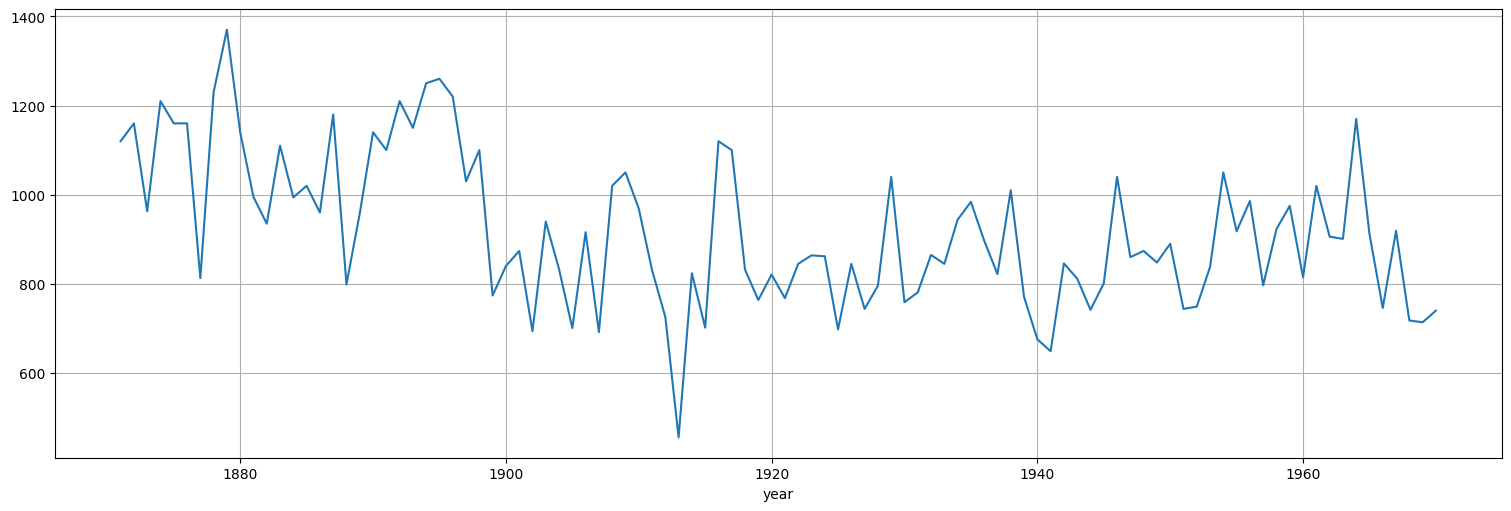

In [61]:
nile = sm.datasets.nile.load()
nile = pd.Series(nile["data"]["volume"].values, index=nile["data"]["year"])
nile.plot();

### Ejercicio 3

Se considera la serie $x$ de niveles de $CO$, así como la serie $y$ de mortalidad semanal por causas respiratorias. Ambas son parte del objeto `lap` de la biblioteca `astsa`. Ambas series comienzan en $1970$ y tienen una frecuencia semanal (`freq=52`).

1. Analice la correlación cruzada entre ambas series.
2. ¿Para que valor de lag se da la mayor correlación entre ambas?
3. Se propone un modelo de la forma $y_t = \beta_0 + \beta_1 x_{t-l} + w_t$ con $x$ e $y$ como antes y $l$ el lag de la parte anterior. Realice un ajuste lineal para estimar los parámetros $\beta_0$ y $\beta_1$.
4. ¿Cuánto de la varianza de la serie original se explica por la relación entre $x$ e $y$?
5. Realice un gráfico de la predicción del modelo (no olvide que la primera predicción será luego de $l$ lags) y la mortalidad observada. 
6. Analice los residuos del modelo y discuta si aún queda información por ajustar.

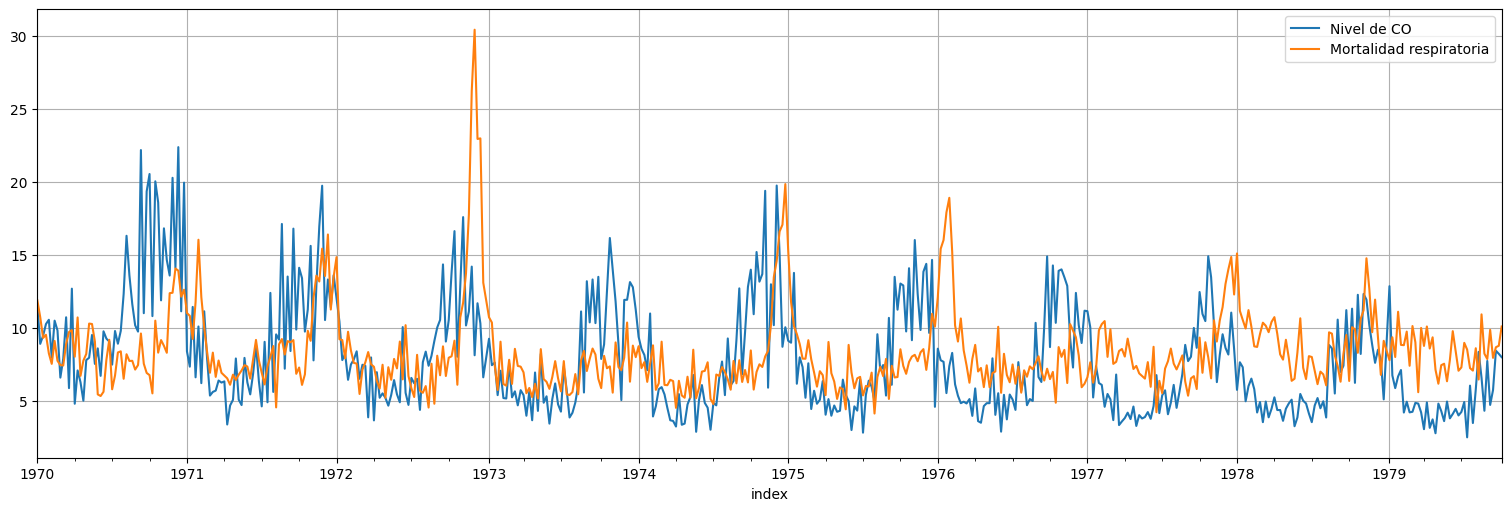

In [62]:
x = astsa.lap["co"]
y = astsa.lap["rmort"]

x.plot(label="Nivel de CO");
y.plot(label="Mortalidad respiratoria");
plt.legend();

1. Analice la correlación cruzada entre ambas series.

In [63]:
def ccf(x, y, max_lag, ax=None, **kwargs):
    lags = np.arange(-max_lag, max_lag + 1)

    backwards = sm.tsa.ccf(x[::-1], y[::-1], adjusted=False)[max_lag::-1]
    forwards = sm.tsa.ccf(x, y, adjusted=False)[:max_lag + 1]
    ccf = np.r_[backwards[:-1], forwards]
    ylabel = "CCF"

    if ax is None:
        ax = plt.gca()
    
    ax.stem(lags, ccf, basefmt="k")
    ax.axvline(0, color="black", linestyle="--", linewidth=1)
    conf_level = 1.96 / np.sqrt(x.shape[0])
    ax.fill_between(lags,conf_level,-conf_level,alpha=0.25)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    
    return ax

Text(0.5, 1.0, 'co vs rmort')

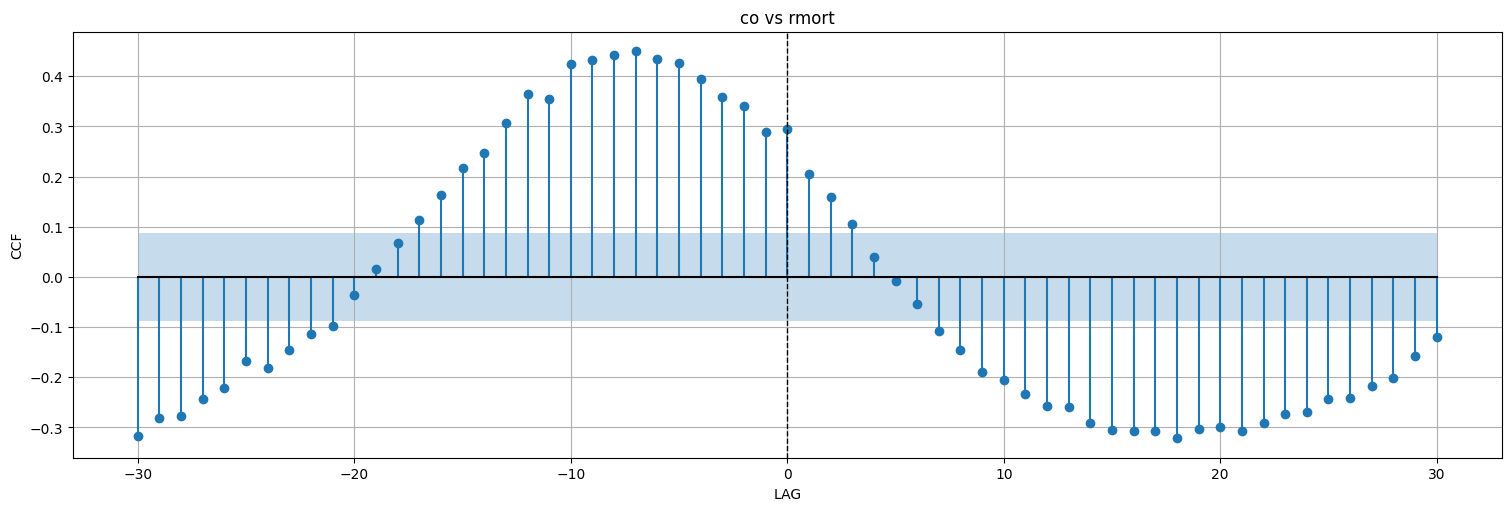

In [64]:
ccf(x,y, max_lag=30)
plt.title("co vs rmort")

2. ¿Para que valor de lag se da la mayor correlación entre ambas?

In [65]:
import numpy as np
import statsmodels.api as sm

def find_max_corr_lag(x, y, max_lag):
    lags = np.arange(-max_lag, max_lag + 1)
    
    # Calcular la correlación cruzada hacia atrás y hacia adelante
    backwards = sm.tsa.ccf(x[::-1], y[::-1], adjusted=False)[max_lag::-1]
    forwards = sm.tsa.ccf(x, y, adjusted=False)[:max_lag + 1]
    ccf_values = np.r_[backwards[:-1], forwards]
    
    # Encontrar el índice del valor absoluto máximo
    max_corr_index = np.argmax(np.abs(ccf_values))
    
    # Determinar el lag correspondiente y el valor de la correlación
    max_corr_lag = lags[max_corr_index]
    max_corr_value = ccf_values[max_corr_index]
    
    return max_corr_lag, max_corr_value

# Usar la función para encontrar el lag con la mayor correlación
max_lag, max_corr_value = find_max_corr_lag(x, y, max_lag=30)

print(f"El lag con la mayor correlación absoluta es: {max_lag} con una correlación de {max_corr_value}")

El lag con la mayor correlación absoluta es: -7 con una correlación de 0.4502768973285299


3. Se propone un modelo de la forma $y_t = \beta_0 + \beta_1 x_{t-l} + w_t$ con $x$ e $y$ como antes y $l$ el lag de la parte anterior. Realice un ajuste lineal para estimar los parámetros $\beta_0$ y $\beta_1$.